<a href="https://colab.research.google.com/github/adarshetty11/Final-Year-Project/blob/main/leaf_detection_model_mobilenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14529292972592173313, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14674281152
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8884563771987492517
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/project_dataset/dataset.zip', 'r') as z:
   z.extractall()

In [8]:
image_size = 224
batch_size = 32
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0,
                                                            shear_range = 0.2,
                                                            zoom_range = 0.2,
                                                            width_shift_range = 0.2,
                                                            height_shift_range = 0.2,
                                                            fill_mode="nearest")
train_data = train_datagen.flow_from_directory('/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
                                               target_size=(image_size,image_size),
                                               batch_size=batch_size,
                                               class_mode="categorical"                                               
                                              )

Found 70295 images belonging to 38 classes.


In [9]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0)
test_data = test_datagen.flow_from_directory('/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
                                               target_size=(image_size,image_size),
                                               batch_size=batch_size,
                                               class_mode="categorical"                                               
                                              )

Found 17572 images belonging to 38 classes.


In [10]:
categories = list(train_data.class_indices.keys())
categories

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [11]:
#mobilenet

base_model = keras.applications.MobileNet(weights="imagenet",include_top=False,input_shape=(image_size,image_size,3))

17227776/17225924 [==============================] - 0s 0us/step


In [12]:
base_model.trainable = False
inputs = keras.Input(shape=(image_size,image_size,3))
x = base_model(inputs,training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(len(categories),activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=x, name="LeafDisease_MobileNet")
model.summary()

Model: "LeafDisease_MobileNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 38)                38950     
Total params: 3,267,814
Trainable params: 38,950
Non-trainable params: 3,228,864
_________________________________________________________________


In [13]:
optimizer = keras.optimizers.Adam()
model.compile(optimizer=optimizer,loss=keras.losses.CategoricalCrossentropy(from_logits=True),metrics=[keras.metrics.CategoricalAccuracy()])

In [14]:
history = model.fit_generator(train_data,
          validation_data=test_data,
          epochs=25,
          steps_per_epoch=150,
          validation_steps=100
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
150/150 [==============================] - 73s 434ms/step - loss: 2.9381 - categorical_accuracy: 0.2733 - val_loss: 0.8033 - val_categorical_accuracy: 0.8016
Epoch 2/25
150/150 [==============================] - 64s 427ms/step - loss: 0.8389 - categorical_accuracy: 0.7738 - val_loss: 0.4881 - val_categorical_accuracy: 0.8681
Epoch 3/25
150/150 [==============================] - 64s 426ms/step - loss: 0.5876 - categorical_accuracy: 0.8280 - val_loss: 0.3929 - val_categorical_accuracy: 0.8859
Epoch 4/25
150/150 [==============================] - 63s 418ms/step - loss: 0.4827 - categorical_accuracy: 0.8553 - val_loss: 0.3313 - val_categorical_accuracy: 0.9075
Epoch 5/25
150/150 [==============================] - 62s 416ms/step - loss: 0.4242 - categorical_accuracy: 0.8760 - val_loss: 0.2841 - val_categorical_accuracy: 0.9131
Epoch 6/25
150/150 [==============================] - 61s 409ms/step - loss: 0.3740 - categorical_accuracy: 0.8834 - val_loss: 0.2828 - val_categorical_acc

In [15]:
model.evaluate(test_data)

550/550 [==============================] - 40s 72ms/step - loss: 0.1655 - categorical_accuracy: 0.9445


[0.16548582911491394, 0.9444571137428284]

In [16]:
model.save('leaf-cnn-mobilenet.h5')

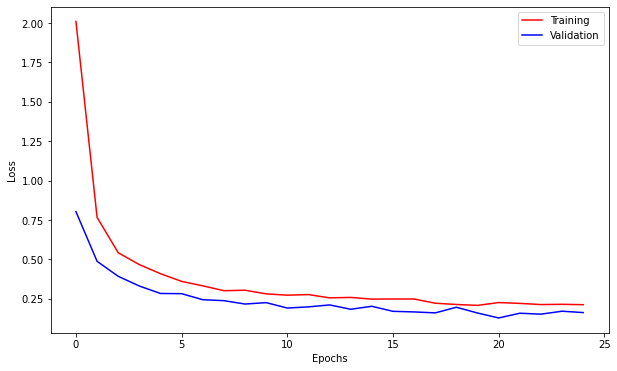

In [18]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,val_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


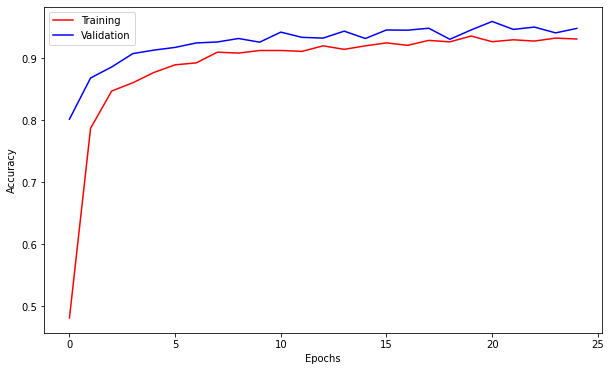

In [19]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

epochs = range(len(acc))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,acc,c="red",label="Training")
plt.plot(epochs,val_acc,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
##Testing

In [20]:
model = tf.keras.models.load_model('leaf-cnn-mobilenet.h5')

Apple___Apple_scab


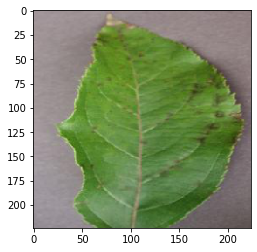

In [24]:
test_image_path = "/content/test/test/AppleScab1.JPG"
new_img = tf.keras.preprocessing.image.load_img(test_image_path, target_size=(224,224))
img = tf.keras.preprocessing.image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255.0
prediction = model.predict(img)

plt.imshow(new_img)
print(categories[np.argmax(prediction)])

Tomato___healthy


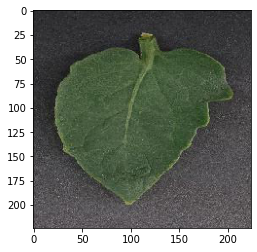

In [26]:
test_image_path = "/content/test/test/TomatoHealthy2.JPG"
new_img = tf.keras.preprocessing.image.load_img(test_image_path, target_size=(224,224))
img = tf.keras.preprocessing.image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255.0
prediction = model.predict(img)

plt.imshow(new_img)
print(categories[np.argmax(prediction)])

Tomato___Early_blight


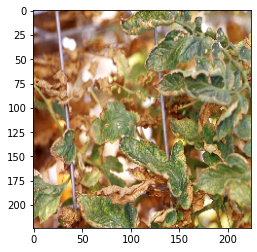

In [27]:
test_image_path = "/content/drive/MyDrive/project_dataset/test_images/tomato_diseased.jpg"
new_img = tf.keras.preprocessing.image.load_img(test_image_path, target_size=(224,224))
img = tf.keras.preprocessing.image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255.0
prediction = model.predict(img)

plt.imshow(new_img)
print(categories[np.argmax(prediction)])

Tomato___Early_blight


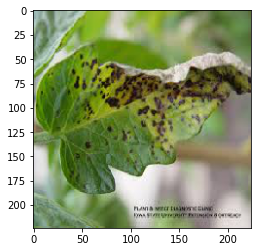

In [28]:
test_image_path = "/content/drive/MyDrive/project_dataset/test_images/tomato_diseased2.jpg"
new_img = tf.keras.preprocessing.image.load_img(test_image_path, target_size=(224,224))
img = tf.keras.preprocessing.image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255.0
prediction = model.predict(img)

plt.imshow(new_img)
print(categories[np.argmax(prediction)])

Corn_(maize)___Common_rust_


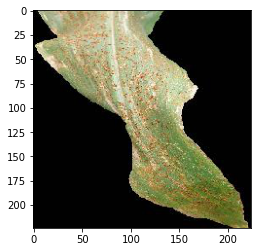

In [29]:
test_image_path = "/content/drive/MyDrive/project_dataset/test_images/CornCommonRust3.JPG"
new_img = tf.keras.preprocessing.image.load_img(test_image_path, target_size=(224,224))
img = tf.keras.preprocessing.image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255.0
prediction = model.predict(img)

plt.imshow(new_img)
print(categories[np.argmax(prediction)])

In [30]:
#converting to tflite for mobile application

In [32]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
f = open("leaf-cnn-mobilenet.tflite",'wb')
f.write(tflite_model)
f.close()

INFO:tensorflow:Assets written to: /tmp/tmpvd3f9ecj/assets


INFO:tensorflow:Assets written to: /tmp/tmpvd3f9ecj/assets
